#This dataset is about determining the level of each heart disease data

#It was also observed that the dataset is labelled hence we must use supervised learning algorithm and with the output variable being categorical, we can try classification algorithm.

#Will be implementing KNN,SVM and logistic regression algorithms and comparing three accuracy scores

#1. Start by importing all necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp
from sklearn import metrics

#2. Import dataset

In [2]:
data = pd.read_csv(r'D:\DataScience\MyProjects\heart_desease_data.csv')
df=pd.DataFrame(data)
print(df.to_string())

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1        0      150      0      2.3      0   0     1       1
1     37    1   2       130   250    0        1      187      0      3.5      0   0     2       1
2     41    0   1       130   204    0        0      172      0      1.4      2   0     2       1
3     56    1   1       120   236    0        1      178      0      0.8      2   0     2       1
4     57    0   0       120   354    0        1      163      1      0.6      2   0     2       1
5     57    1   0       140   192    0        1      148      0      0.4      1   0     1       1
6     56    0   1       140   294    0        0      153      0      1.3      1   0     2       1
7     44    1   1       120   263    0        1      173      0      0.0      2   0     3       1
8     52    1   2       172   199    1        1      162      0      0.5      2   0     3       1
9     57    1   2   

#3. Select features for x and y

In [3]:
x =df.iloc[:, 0:-1].values # independent variable
y =df.iloc[:, -1].values # dependant variable

#4. Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

#5. Since the values are in different decimal scales, we do feature scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#6. Fitting Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
df2=pd.DataFrame(x_test)
print(df2.to_string)

<bound method DataFrame.to_string of           0         1         2         3         4         5         6   \
0   1.679068  0.702439 -0.919827  0.774976 -1.357433 -0.426956  0.891740   
1   1.015817  0.702439  1.940457  2.226458 -0.380682 -0.426956 -0.982565   
2   0.463107  0.702439  1.940457  2.226458  0.743503 -0.426956 -0.982565   
3   0.573649  0.702439 -0.919827 -0.386209  0.190625 -0.426956 -0.982565   
4   0.794733  0.702439  0.987029 -0.095913 -0.306965 -0.426956  0.891740   
..       ...       ...       ...       ...       ...       ...       ...   
71 -1.195021  0.702439  0.987029  0.484680 -0.233248 -0.426956 -0.982565   
72  0.131482  0.702439  0.033601 -0.676506 -0.141102 -0.426956  0.891740   
73  0.020940  0.702439 -0.919827  1.645865  0.761932 -0.426956 -0.982565   
74  1.126358 -1.423610 -0.919827  1.065272 -0.417541 -0.426956 -0.982565   
75 -0.421228  0.702439  0.987029 -1.257098 -1.339004 -0.426956  0.891740   

          7         8         9         10        

#7. Predicting the Test set results

In [7]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df2.to_string())

    Actual  Predicted
0        0          0
1        1          1
2        0          1
3        0          0
4        1          0
5        0          0
6        0          0
7        0          0
8        0          0
9        0          0
10       1          1
11       1          1
12       0          0
13       1          1
14       1          1
15       1          1
16       1          0
17       1          1
18       0          0
19       1          1
20       1          1
21       0          0
22       0          0
23       0          0
24       1          1
25       0          1
26       0          0
27       0          0
28       1          1
29       1          1
30       0          1
31       0          0
32       1          1
33       1          1
34       1          1
35       0          1
36       0          0
37       1          1
38       0          0
39       0          0
40       1          1
41       1          1
42       1          0
43       0          0
44       1

#8. Evaluating Algorithm

In [8]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
acc1=metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy:",acc1)

Mean Absolute Error: 0.17105263157894737
Mean Squared Error: 0.17105263157894737
Root Mean Squared Error: 0.4135850959342556
Accuracy: 82.89473684210526


#9. Fitting K-Nearest Neighbour Algorithm

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

#10. Predicting the Test set results

In [10]:
y_pred= classifier.predict(x_test)
print("Prediction comparison")
ddf=pd.DataFrame({"Y_test":y_test,"Y-pred":y_pred})
print(ddf.to_string())

Prediction comparison
    Y_test  Y-pred
0        0       0
1        1       0
2        0       0
3        0       0
4        1       0
5        0       1
6        0       0
7        0       0
8        0       0
9        0       0
10       1       1
11       1       1
12       0       0
13       1       1
14       1       1
15       1       1
16       1       0
17       1       1
18       0       0
19       1       1
20       1       1
21       0       0
22       0       0
23       0       0
24       1       1
25       0       1
26       0       0
27       0       0
28       1       1
29       1       1
30       0       0
31       0       0
32       1       1
33       1       1
34       1       1
35       0       0
36       0       0
37       1       1
38       0       0
39       0       1
40       1       1
41       1       1
42       1       1
43       0       0
44       1       1
45       1       0
46       1       1
47       0       0
48       0       0
49       1       1
50       

#11. Evaluating Algorithm

In [11]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
acc2 = accuracy_score(y_test, y_pred)*100
print('Accuracy: ',acc2)

Mean Absolute Error: 0.15789473684210525
Mean Squared Error: 0.15789473684210525
Root Mean Squared Error: 0.39735970711951313
Accuracy:  84.21052631578947


#12. Fitting Support Vector Machine Algorithm

In [12]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

#13. Predicting the Test set results

In [13]:
y_pred= classifier.predict(x_test)
df2=pd.DataFrame({"Actual Y_Test":y_test,"Prediction Data":y_pred})
print("prediction status")
print(df2.to_string())

prediction status
    Actual Y_Test  Prediction Data
0               0                0
1               1                1
2               0                1
3               0                0
4               1                0
5               0                0
6               0                0
7               0                0
8               0                0
9               0                0
10              1                1
11              1                1
12              0                0
13              1                1
14              1                1
15              1                1
16              1                0
17              1                1
18              0                0
19              1                1
20              1                1
21              0                0
22              0                0
23              0                0
24              1                1
25              0                1
26              0                0
27

#14. Evaluating Algorithm

Mean Absolute Error: 0.14473684210526316
Mean Squared Error: 0.14473684210526316
Root Mean Squared Error: 0.3804429551263411
Accuracy: 85.52631578947368


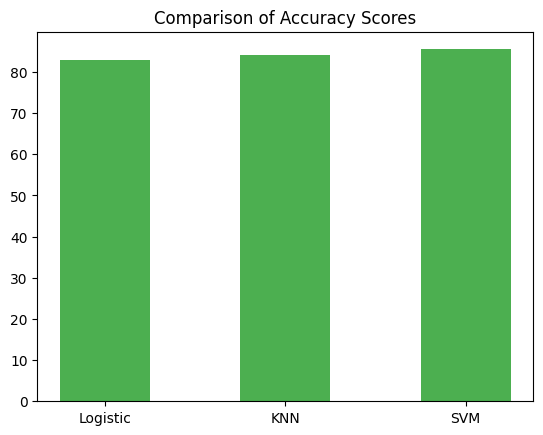

In [14]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
acc3 = accuracy_score(y_test, y_pred)*100
print('Accuracy:',acc3)

x = np.array(["Logistic", "KNN", "SVM"])
y = np.array([acc1,acc2,acc3])
mtp.bar(x, y, color="#4CAF50", width=0.5)
mtp.title('Comparison of Accuracy Scores')
mtp.show()